# Supervised Learning Algorithm

## 1. Linier Regression

Mengimport packages yang dibutuhkan:

In [1]:
import numpy as np

Membuat fungsi $f_{w,b}(x) = w.x + b$ 

In [2]:
# membuat fungsi f_wb
def f_wb(x,w,b):
    f_wb = np.dot(x,w) + b
    return f_wb

Membuat cost function $J(w,b) = 1/2m \sum{(w.x + b - y)^2}$

In [3]:
def j_wb(x,y,w,b):
    m = y.shape[0]
    fwb = f_wb(x,w,b)
    j = np.round(1/(2*m) * np.sum((fwb - y)**2),5)
    return j

Contoh #1

In [4]:
# Contoh 1
# Menyiapkan Dataset
x1 = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
y1 = np.array([16,32,51])

# Menginisiasi nilai parameter w dan b
w_init = np.ones(x1.shape[1])*2
b_init = 3

# Menghitung fungsi f dan j
fwb = f_wb(x1,w_init,b_init)
jwb = j_wb(x1,y1,w_init,b_init)

print(f'y: {y1} | f_wb: {fwb} | j_wb: {jwb}')

y: [16 32 51] | f_wb: [15. 33. 51.] | j_wb: 0.33333


Gradient Descent untuk mencari nilai minimum J

In [5]:
def graddesc(x,y,w,b,alpha=1e-5,num_iteration=1000):
    m = y.shape[0]
    fwb = f_wb(x,w,b)
    jwb = j_wb(x,y,w,b)
    for _ in range(num_iteration):
        djdw = 1/m * np.dot((fwb - y),x)
        djdb = 1/m * np.sum(fwb - y)
        w = w - alpha*djdw
        b = b - alpha*djdb
        fwb = f_wb(x,w,b)
        jwb = j_wb(x,y,w,b)
    return w,b,fwb,jwb

In [6]:
w,b,fwb,jwb = graddesc(x1,y1,w_init,b_init,2e-2,10000)

In [7]:
print(w)
print(b)
print(fwb)
print(y1)
print(jwb)

[1.66666667 1.94444444 2.22222222]
3.2777777777777657
[15.5 33.  50.5]
[16 32 51]
0.25


Contoh 2

In [8]:
# Contoh 2

# Menyiapkan dataset
x2 = np.array((np.random.randint(500,1000,5),np.random.randint(1,6,5)),dtype=float).T
y2 = np.array([200,900,150,190,210])

# Inisiasi w dan b
w_init = np.ones(x2.shape[1])
b_init = 0

# Menghitung fwb dan jwb
fwb = f_wb(x2,w_init,b_init)
jwb = j_wb(x2,y2,w_init,b_init)

print(fwb)
print(x2)
print(x2.shape)
print(y2)
print(y2.shape)
print(jwb)

[592. 780. 910. 765. 854.]
[[587.   5.]
 [779.   1.]
 [905.   5.]
 [762.   3.]
 [850.   4.]]
(5, 2)
[200 900 150 190 210]
(5,)
149102.5


In [9]:
mean = np.mean(x2,axis=0)
mean

array([776.6,   3.6])

In [10]:
max = np.max(x2[:,1])
min = np.min(x2[:,1])
selisih = max - min
print(f'{x2[:,1]} - {mean[1]} = {(x2[:,1]-mean[1])/selisih}')

[5. 1. 5. 3. 4.] - 3.6 = [ 0.35 -0.65  0.35 -0.15  0.1 ]


Menggunakan feature scaling

In [11]:
# Mean Normalization
def mean_normalize(x):
    mean = np.mean(x,axis=0)
    x_cop = np.copy(x)
    try:
        m,n = x_cop.shape
        for i in range(n):
            max = np.max(x_cop[:,i])
            min = np.min(x_cop[:,i])
            x_cop[:,i] = (x_cop[:,i] - mean[i])/(max-min)
    except:
        max = np.max(x)
        max = np.min(x)
        x_cop = (x_cop - mean) / (max - min)

    return x_cop



In [12]:
x2_norm = mean_normalize(x2)

In [13]:
# print(x2_norm)
print(x2)

[[587.   5.]
 [779.   1.]
 [905.   5.]
 [762.   3.]
 [850.   4.]]


In [14]:
def z_normalized(x):
    mean = np.mean(x,axis=0)
    mu = np.std(x,axis=0)
    x_cop = np.copy(x)
    try:
        n = x.shape[1]
        for i in range(n):
            x_cop[:,i] = (x_cop[:,i] - mean[i])/ mu[i]
    except:
        x_cop = (x_cop - mean) / mu
    return x_cop

In [15]:
z_x2 = z_normalized(x2)

In [16]:
print(z_x2)
print(x2_norm)
print(x2)

[[-1.7597669   0.93541435]
 [ 0.02227553 -1.73719807]
 [ 1.19174087  0.93541435]
 [-0.13550948 -0.40089186]
 [ 0.68125997  0.26726124]]
[[-0.59622642  0.35      ]
 [ 0.00754717 -0.65      ]
 [ 0.40377358  0.35      ]
 [-0.04591195 -0.15      ]
 [ 0.23081761  0.1       ]]
[[587.   5.]
 [779.   1.]
 [905.   5.]
 [762.   3.]
 [850.   4.]]


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

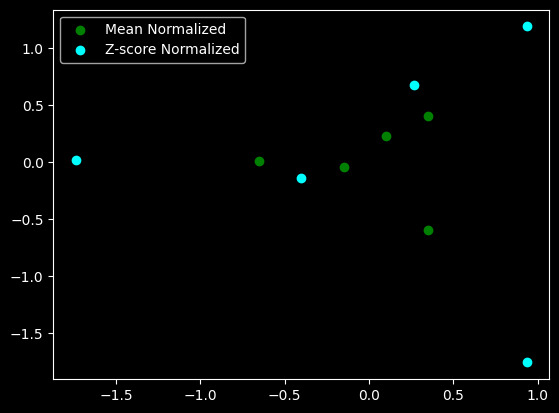

In [21]:
# plt.scatter(x2[:,1],x2[:,0],label='Unnormalized',color='r')
plt.scatter(x2_norm[:,1],x2_norm[:,0],label='Mean Normalized',color='g')
plt.scatter(z_x2[:,1],z_x2[:,0],label='Z-score Normalized',color='cyan')
plt.legend()
plt.show()

In [77]:
w2,b3,fwb2,jwb2 = graddesc(x2_norm,y2,w_init,b_init,1e-3)
w3,b3,fwb3,jwb3 = graddesc(z_x2,y2,w_init,b_init,1)

print("Error")
print(jwb2)
print(jwb3)
print()
print("Data Asli dan Prediksi")
print(y2)
print(fwb)
print(fwb2)
print(fwb3)
print()
print("Parameter w")
print(w_init)
print(w2)
print(w3)

Error
40539.86666
8975.27917

Data Asli dan Prediksi
[200 900 150 190 210]
[592. 780. 910. 765. 854.]
[179.31011666 265.1035942  177.55040241 221.76969372 199.56874214]
[135.79744641 768.6793826   64.85506523 434.61436383 246.05374192]

Parameter w
[1. 1.]
[ -1.75971425 -86.85594652]
[ -24.03597982 -252.82942905]


Menggunakan Scikit-Learn

In [55]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [57]:
# Scale/Normalize Training Data
scaler = StandardScaler()
X2_norm = scaler.fit_transform(x2)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x2,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X2_norm,axis=0)}")
print(f"Peak to Peak range by column in Normalized Tanpa Scikit-Learn X:{np.ptp(x2_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[318.   4.]
Peak to Peak range by column in Normalized X:[2.95150777 2.67261242]
Peak to Peak range by column in Normalized Tanpa Scikit-Learn X:[1. 1.]


In [84]:
# Membuat dan fit regresssion model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X2_norm, y2)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")


SGDRegressor()
number of iterations completed: 1000, number of weight updates: 5001.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [85]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [ -24.00870455 -252.73546101], b:[329.96993351]


In [86]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X2_norm)
# make a prediction using w,b. 
y_pred = np.dot(X2_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y2[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[135.80728085 768.4866826   64.94540285 434.54293027]
Target values 
[200 900 150 190]


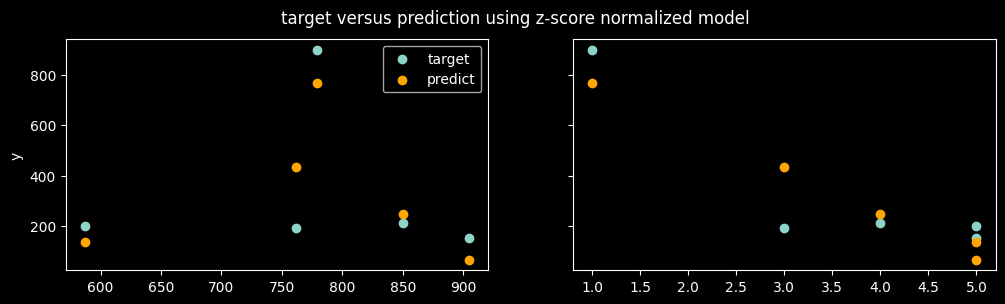

In [87]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x2[:,i],y2, label = 'target')
    ax[i].scatter(x2[:,i],y_pred,color='orange', label = 'predict')
ax[0].set_ylabel("y"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [78]:
my_ypred = np.dot(z_x2,w3) + b3

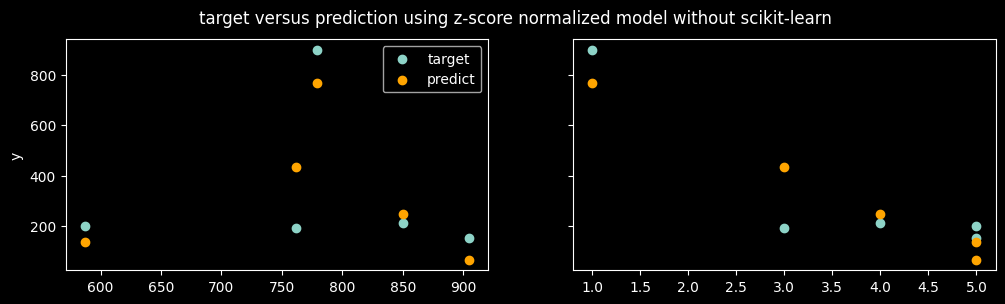

In [79]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x2[:,i],y2, label = 'target')
    ax[i].scatter(x2[:,i],my_ypred,color='orange', label = 'predict')
ax[0].set_ylabel("y"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model without scikit-learn")
plt.show()

In [88]:
error1 = j_wb(X2_norm,y2,w_norm,b_norm)
error2 = j_wb(z_x2,y2,w3,b3)

In [90]:
print(error1)
print(error2)

print(w3)
print(w_norm)

8975.28423
8975.27917
[ -24.03597982 -252.82942905]
[ -24.00870455 -252.73546101]
